In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

initial_results = pd.read_csv('FeatureSelectionAndExtraction.csv', decimal=",", header=[1])
initial_results.head()

,Algorithm,Accuracy,Precision,Sensitivity,Specificity,F1 Score,Accuracy.1,Precision.1,Sensitivity.1,Specificity.1,F1 Score.1
0,PCA 100%,0.950155,0.983651,0.948731,0.954876,0.965845,0.006845,0.007052,0.007316,0.018234,0.004703
1,PCA 75%,0.950155,0.983651,0.948731,0.954876,0.965845,0.006845,0.007052,0.007316,0.018234,0.004703
2,PCA 50%,0.950155,0.983651,0.948731,0.954876,0.965845,0.006845,0.007052,0.007316,0.018234,0.004703
3,PCA 25%,0.950538,0.983659,0.949238,0.954876,0.966113,0.006618,0.007050,0.006895,0.018234,0.004565
4,Filter 100%,0.950155,0.983651,0.948731,0.954876,0.965845,0.006845,0.007052,0.007316,0.018234,0.004703


In [37]:
initial_results_stacked = pd.melt(initial_results, id_vars=['Algorithm'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')
initial_results_stacked.head()

,Algorithm,Metric,Percentage
0,PCA 100%,Accuracy,0.950155
1,PCA 75%,Accuracy,0.950155
2,PCA 50%,Accuracy,0.950155
3,PCA 25%,Accuracy,0.950538
4,Filter 100%,Accuracy,0.950155


In [38]:
initial_results_stacked_2 = pd.melt(initial_results, id_vars=['Algorithm'],value_vars=['Accuracy.1','Precision.1','Sensitivity.1','Specificity.1','F1 Score.1'], var_name='Metric',value_name='Std')
initial_results_stacked_2.head()

,Algorithm,Metric,Std
0,PCA 100%,Accuracy.1,0.006845
1,PCA 75%,Accuracy.1,0.006845
2,PCA 50%,Accuracy.1,0.006845
3,PCA 25%,Accuracy.1,0.006618
4,Filter 100%,Accuracy.1,0.006845


In [39]:
initial_results_stacked['Std'] = initial_results_stacked_2['Std']
initial_results_stacked.head()

,Algorithm,Metric,Percentage,Std
0,PCA 100%,Accuracy,0.950155,0.006845
1,PCA 75%,Accuracy,0.950155,0.006845
2,PCA 50%,Accuracy,0.950155,0.006845
3,PCA 25%,Accuracy,0.950538,0.006618
4,Filter 100%,Accuracy,0.950155,0.006845


In [40]:
dfCopy = initial_results_stacked.copy()
duplicates = 30 # increase this number to increase precision
for index, row in initial_results_stacked.iterrows():
    for times in range(duplicates):
        new_row = row.copy()
        new_row['Percentage'] = np.random.normal(row['Percentage'],row['Std']) 
        dfCopy = dfCopy.append(new_row, ignore_index=True)

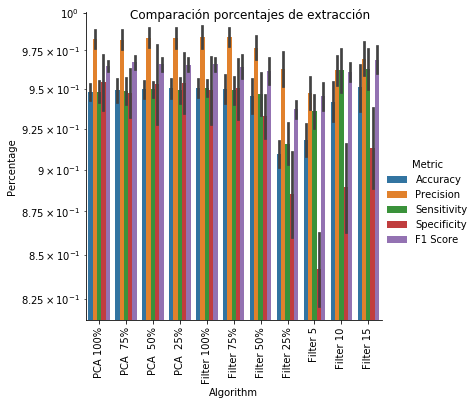

In [14]:
graph = sns.catplot(x="Algorithm", y="Percentage", ci="sd", hue='Metric', kind="bar", data=dfCopy)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
graph.fig.suptitle('Comparación porcentajes de extracción')
graph.savefig('Graphs/percentageComparison.jpg')

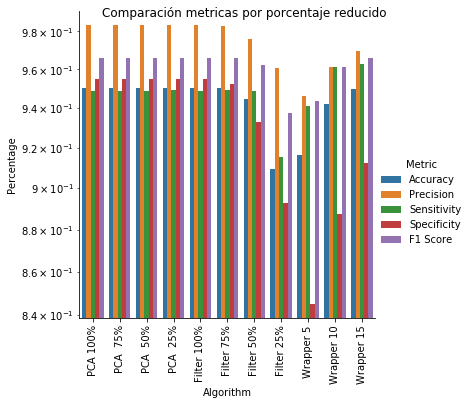

In [41]:
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', ci="Std", kind="bar", data=initial_results_stacked)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
graph.fig.suptitle('Comparación metricas por porcentaje reducido')
graph.savefig('Graphs/percentageComparison.jpg')


In [42]:
feature_extraction = pd.melt(initial_results[0:4], id_vars=['Algorithm'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')

feature_extraction_2 = pd.melt(initial_results[0:4], id_vars=['Algorithm'],value_vars=['Accuracy.1','Precision.1','Sensitivity.1','Specificity.1','F1 Score.1'], var_name='Metric',value_name='Std')

feature_extraction['Std'] = feature_extraction_2['Std']
feature_extraction.head()

,Algorithm,Metric,Percentage,Std
0,PCA 100%,Accuracy,0.950155,0.006845
1,PCA 75%,Accuracy,0.950155,0.006845
2,PCA 50%,Accuracy,0.950155,0.006845
3,PCA 25%,Accuracy,0.950538,0.006618
4,PCA 100%,Precision,0.983651,0.007052


In [43]:
dfCopy = feature_extraction.copy()
duplicates = 30 # increase this number to increase precision
for index, row in feature_extraction.iterrows():
    for times in range(duplicates):
        new_row = row.copy()
        new_row['Percentage'] = np.random.normal(row['Percentage'],row['Std']) 
        dfCopy = dfCopy.append(new_row, ignore_index=True)

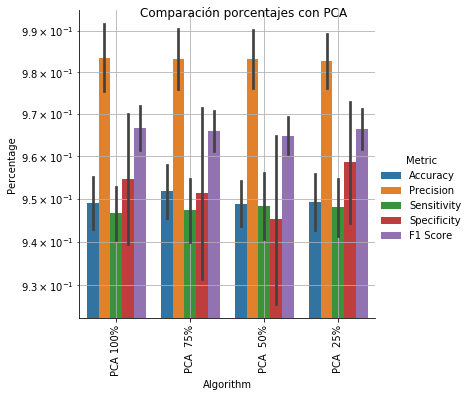

In [44]:
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', ci="sd", kind="bar", data=dfCopy)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
plt.grid(which="both")
graph.fig.suptitle('Comparación porcentajes con PCA')
graph.savefig('Graphs/PCA.jpg')
plt.show()

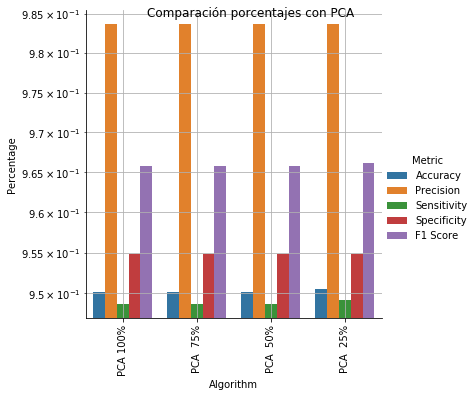

In [18]:
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', ci="Std", kind="bar", data=feature_extraction)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
plt.grid(which="both")
plt.show()

In [45]:
feature_filter = pd.melt(initial_results[4:8], id_vars=['Algorithm'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')

feature_filter_2 = pd.melt(initial_results[4:8], id_vars=['Algorithm'],value_vars=['Accuracy.1','Precision.1','Sensitivity.1','Specificity.1','F1 Score.1'], var_name='Metric',value_name='Std')

feature_filter['Std'] = feature_filter_2['Std']
feature_filter.head()

,Algorithm,Metric,Percentage,Std
0,Filter 100%,Accuracy,0.950155,0.006845
1,Filter 75%,Accuracy,0.950158,0.009832
2,Filter 50%,Accuracy,0.944786,0.011718
3,Filter 25%,Accuracy,0.909510,0.008596
4,Filter 100%,Precision,0.983651,0.007052


In [46]:
dfCopy = feature_filter.copy()
duplicates = 30 # increase this number to increase precision
for index, row in feature_filter.iterrows():
    for times in range(duplicates):
        new_row = row.copy()
        new_row['Percentage'] = np.random.normal(row['Percentage'],row['Std']) 
        dfCopy = dfCopy.append(new_row, ignore_index=True)

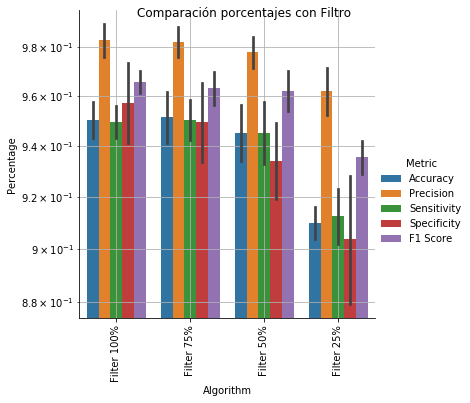

In [47]:
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', ci="sd", kind="bar", data=dfCopy)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
plt.grid(which="both")
graph.fig.suptitle('Comparación porcentajes con Filtro')
graph.savefig('Graphs/Filtering.jpg')
plt.show()

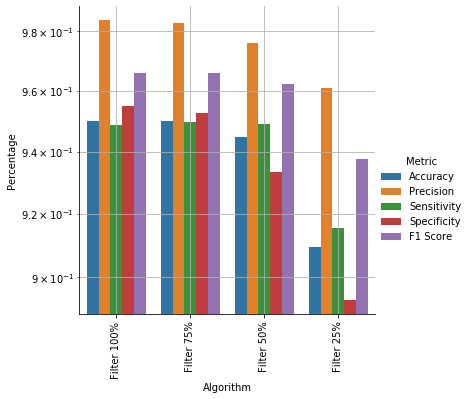

In [22]:
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', ci="Std", kind="bar", data=feature_filter)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
plt.grid(which="both")
plt.show()

In [48]:
feature_wrapping = pd.melt(initial_results[8:], id_vars=['Algorithm'],value_vars=['Accuracy','Precision','Sensitivity','Specificity','F1 Score'], var_name='Metric',value_name='Percentage')

feature_wrapping_2 = pd.melt(initial_results[8:], id_vars=['Algorithm'],value_vars=['Accuracy.1','Precision.1','Sensitivity.1','Specificity.1','F1 Score.1'], var_name='Metric',value_name='Std')

feature_wrapping['Std'] = feature_wrapping_2['Std']
feature_wrapping.head()

,Algorithm,Metric,Percentage,Std
0,Wrapper 5,Accuracy,0.916609,0.011498
1,Wrapper 10,Accuracy,0.942295,0.010780
2,Wrapper 15,Accuracy,0.949771,0.011773
3,Wrapper 5,Precision,0.946300,0.009940
4,Wrapper 10,Precision,0.961054,0.010405


In [49]:
dfCopy = feature_wrapping.copy()
duplicates = 30 # increase this number to increase precision
for index, row in feature_wrapping.iterrows():
    for times in range(duplicates):
        new_row = row.copy()
        new_row['Percentage'] = np.random.normal(row['Percentage'],row['Std']) 
        dfCopy = dfCopy.append(new_row, ignore_index=True)

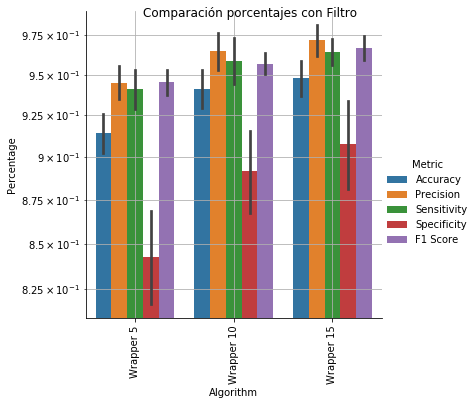

In [50]:
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', ci="sd", kind="bar", data=dfCopy)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
plt.grid(which="both")
graph.fig.suptitle('Comparación porcentajes con Filtro')
graph.savefig('Graphs/Wrapping.jpg')
plt.show()

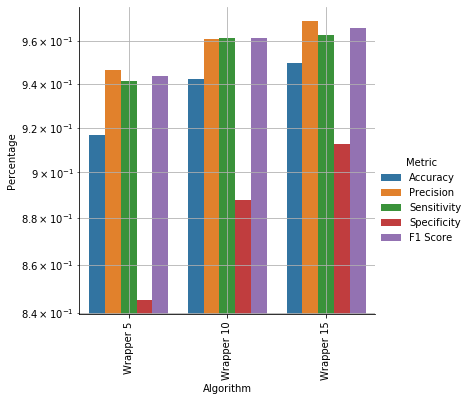

In [51]:
graph = sns.catplot(x="Algorithm", y="Percentage", hue='Metric', ci="Std", kind="bar", data=feature_wrapping)
graph.fig.get_axes()[0].set_yscale("log")
graph.set_xticklabels(rotation=90)
plt.grid(which="both")
plt.show()